<a href="https://colab.research.google.com/github/TakuroTerui/object_gan_autoencoder_image/blob/master/%E3%82%AA%E3%83%BC%E3%83%88%E3%82%A8%E3%83%B3%E3%82%B3%E3%83%BC%E3%83%80%E3%83%BC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader

In [2]:
transform = transforms.Compose([
    transforms.ToTensor(),
    lambda x: x.view(-1) # データの形状を(28, 28)から(784,)に変換
])

mnist_train = torchvision.datasets.MNIST(
    root='/content/drive/MyDrive/Colab Notebooks/Autoencoder/Autoencoder_PyTorch/mnist_root',
    download=True,
    train=True,
    transform=transform
)

mnist_test = torchvision.datasets.MNIST(
    root='/content/drive/MyDrive/Colab Notebooks/Autoencoder/Autoencoder_PyTorch/mnist_root',
    download=True,
    train=False,
    transform=transform
)

train_dataloader = DataLoader(mnist_train, batch_size=124, shuffle=True)
test_dataloader = DataLoader(mnist_test, batch_size=1, shuffle=False)

100%|██████████| 9912422/9912422 [00:00<00:00, 370503780.67it/s]

Extracting /content/drive/MyDrive/Colab Notebooks/Autoencoder/Autoencoder_PyTorch/mnist_root/MNIST/raw/train-images-idx3-ubyte.gz to /content/drive/MyDrive/Colab Notebooks/Autoencoder/Autoencoder_PyTorch/mnist_root/MNIST/raw


100%|██████████| 28881/28881 [00:00<00:00, 122980399.82it/s]

Extracting /content/drive/MyDrive/Colab Notebooks/Autoencoder/Autoencoder_PyTorch/mnist_root/MNIST/raw/train-labels-idx1-ubyte.gz to /content/drive/MyDrive/Colab Notebooks/Autoencoder/Autoencoder_PyTorch/mnist_root/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 106891675.37it/s]

Extracting /content/drive/MyDrive/Colab Notebooks/Autoencoder/Autoencoder_PyTorch/mnist_root/MNIST/raw/t10k-images-idx3-ubyte.gz to /content/drive/MyDrive/Colab Notebooks/Autoencoder/Autoencoder_PyTorch/mnist_root/MNIST/raw




100%|██████████| 4542/4542 [00:00<00:00, 3444941.91it/s]

Extracting /content/drive/MyDrive/Colab Notebooks/Autoencoder/Autoencoder_PyTorch/mnist_root/MNIST/raw/t10k-labels-idx1-ubyte.gz to /content/drive/MyDrive/Colab Notebooks/Autoencoder/Autoencoder_PyTorch/mnist_root/MNIST/raw



In [4]:
import torch

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cuda


In [5]:
import torch.nn as nn

class Autoencoder(nn.Module):
    def __init__(self, device='cpu'):
        super().__init__()
        self.device = device
        self.l1 = nn.Linear(784, 200)
        self.l2 = nn.Linear(200, 784)
    
    def forward(self, x):
        h = self.l1(x)
        h = torch.relu(h)

        h = self.l2(h)
        y = torch.sigmoid(h)
        return y

In [6]:
import torch.optim as optimizers

model = Autoencoder(device=device).to(device)
criterion = nn.BCELoss()
optimizer = optimizers.Adam(model.parameters())

In [7]:
epochs = 10

for epoch in range(epochs):
    train_loss = 0.
    for (x, _) in train_dataloader:
        x = x.to(device)
        model.train()
        preds = model(x)
        loss = criterion(preds, x)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        train_loss += loss.item()
    
    train_loss /= len(train_dataloader)
    print('Epoch({}) -- Loss:{:.3f}'.format(epoch+1, train_loss))

Epoch(1) -- Loss:0.165
Epoch(2) -- Loss:0.091
Epoch(3) -- Loss:0.077
Epoch(4) -- Loss:0.072
Epoch(5) -- Loss:0.070
Epoch(6) -- Loss:0.069
Epoch(7) -- Loss:0.068
Epoch(8) -- Loss:0.067
Epoch(9) -- Loss:0.067
Epoch(10) -- Loss:0.066


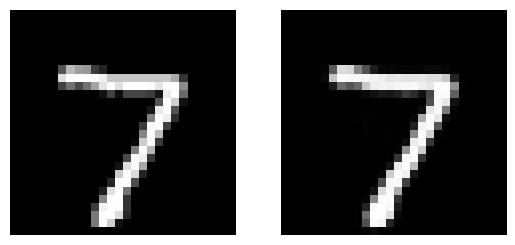

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

x, _ = next(iter(test_dataloader))
x = x.to(device)

model.eval()
x_rec = model(x)

for i, image in enumerate([x, x_rec]):
    image = image.view(28, 28).detach().cpu().numpy()
    plt.subplot(1, 2, i+1)
    plt.imshow(image, cmap='binary_r')
    plt.axis('off')
plt.show()